#Importing Libraries#

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder, StandardScaler
from keras.models import Sequential
from keras.layers import Dense

##2)LOAD THE DATASET##


In [3]:
data=pd.read_csv('/content/drive/MyDrive/IBM ADS/ASSIGNMENTS/penguins_size.csv')

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
data

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [6]:
print(data.shape)

(344, 7)


In [7]:
data.dtypes

species               object
island                object
culmen_length_mm     float64
culmen_depth_mm      float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object

In [8]:
data.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [9]:
data.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [10]:
data.tail()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE
343,Gentoo,Biscoe,49.9,16.1,213.0,5400.0,MALE


In [11]:
data.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


##3)Data Visualisations##

## a)Performing the Univariate Analysis##

<Axes: xlabel='species', ylabel='Count'>

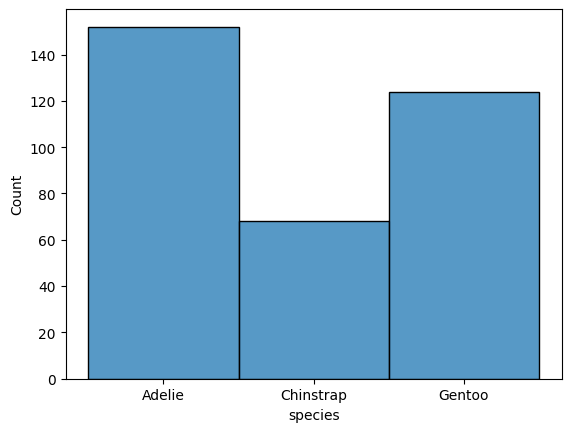

In [12]:
#histogram
sns.histplot(data['species'])

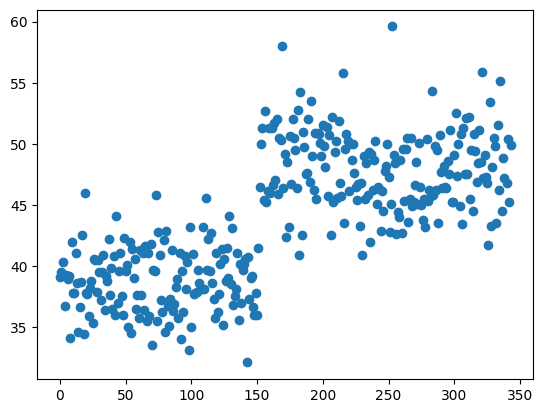

In [13]:
#scatterplot
plt.scatter(data.index,data['culmen_length_mm'])
plt.show()

<Axes: xlabel='species', ylabel='count'>

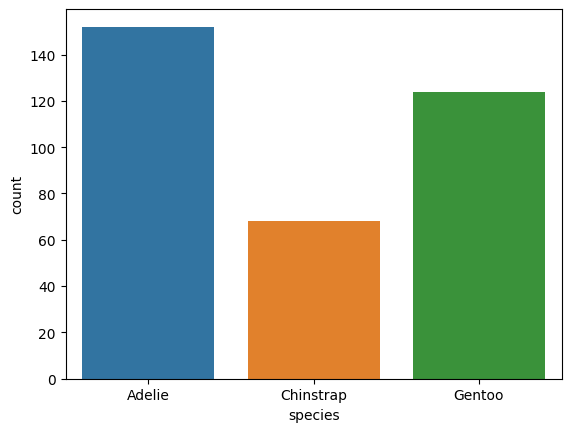

In [14]:
sns.countplot(x=data['species'])

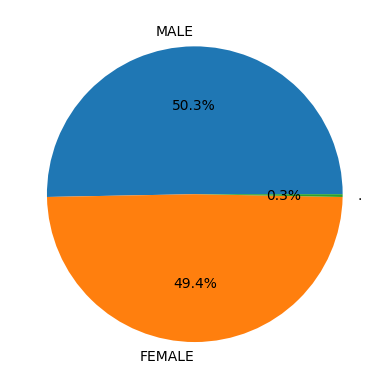

In [15]:
x=data['sex'].value_counts()
plt.pie(x.values,
        labels=x.index,
        autopct='%1.1f%%')
plt.show()

##b)Bivarient Analysis##

<Axes: xlabel='species', ylabel='island'>

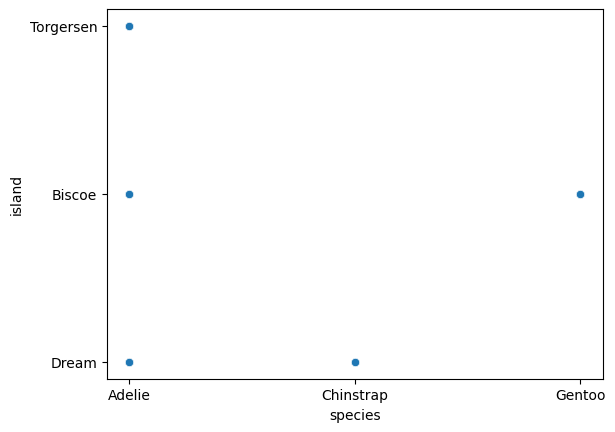

In [16]:
sns.scatterplot(x=data['species'],
                y=data['island'])

<Axes: xlabel='species', ylabel='culmen_length_mm'>

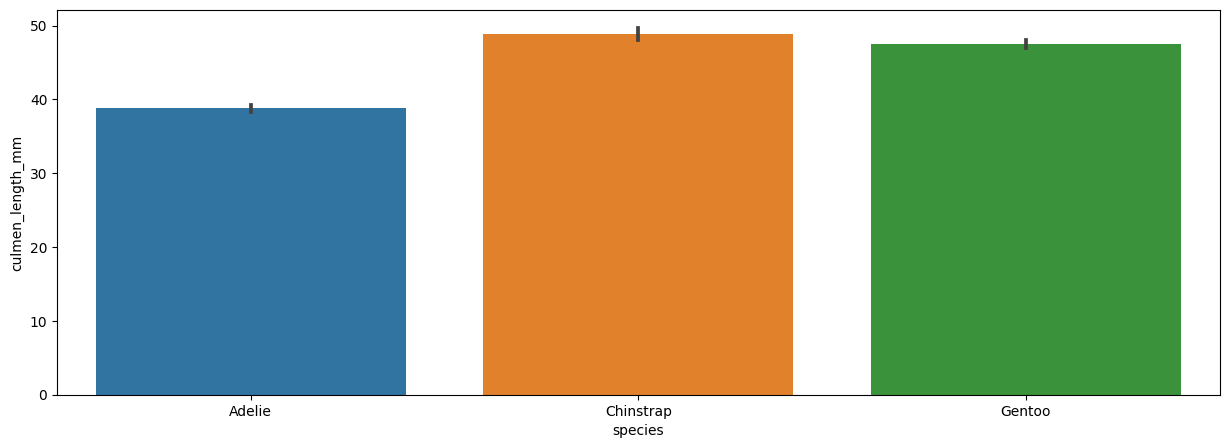

In [17]:
plt.figure(figsize=(15, 5))
sns.barplot(x=data['species'], y=data['culmen_length_mm'])


<Axes: xlabel='island', ylabel='count'>

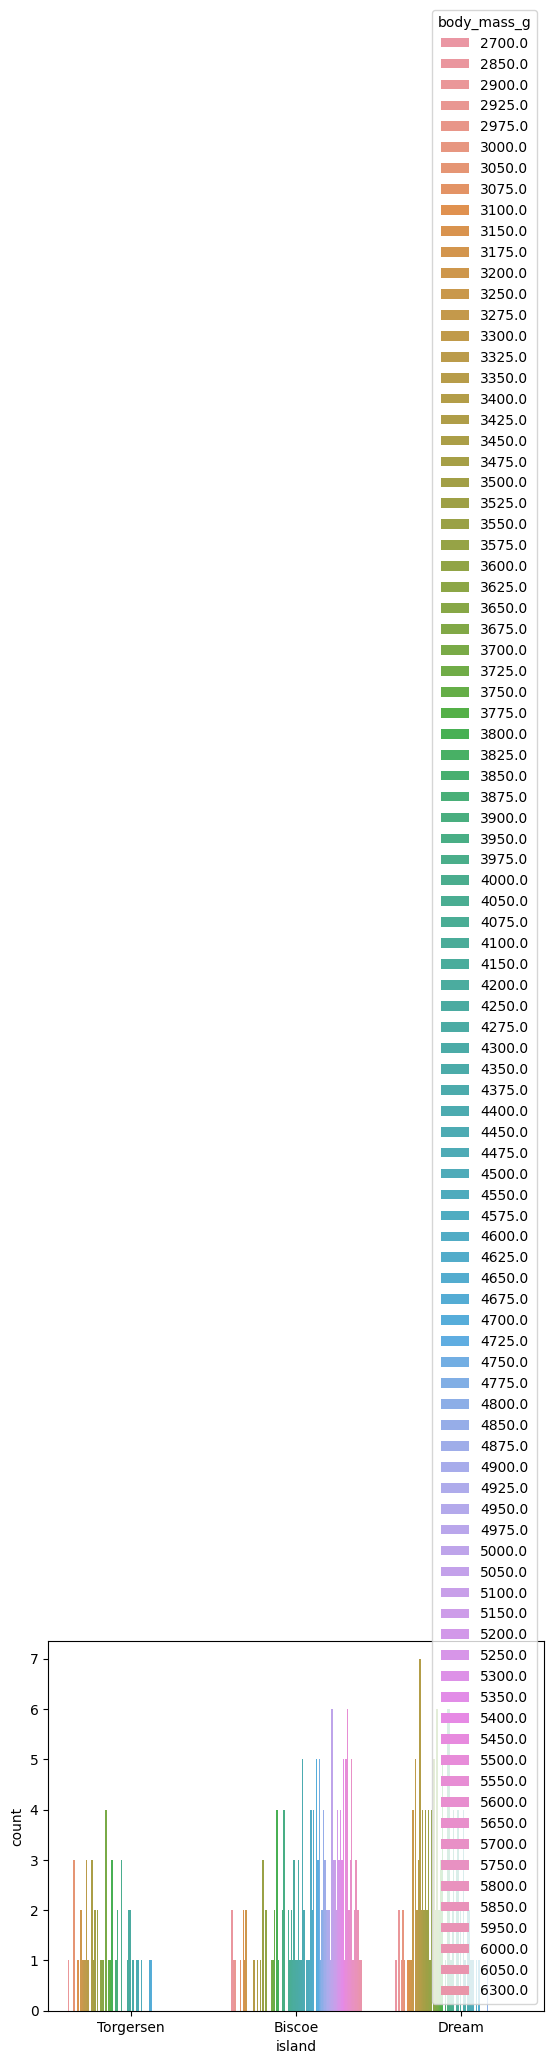

In [18]:
sns.countplot(x=data['island'],hue=data['body_mass_g'])

##c)Multivarient Analysis##

<ipython-input-19-65e566960d46>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True)


<Axes: >

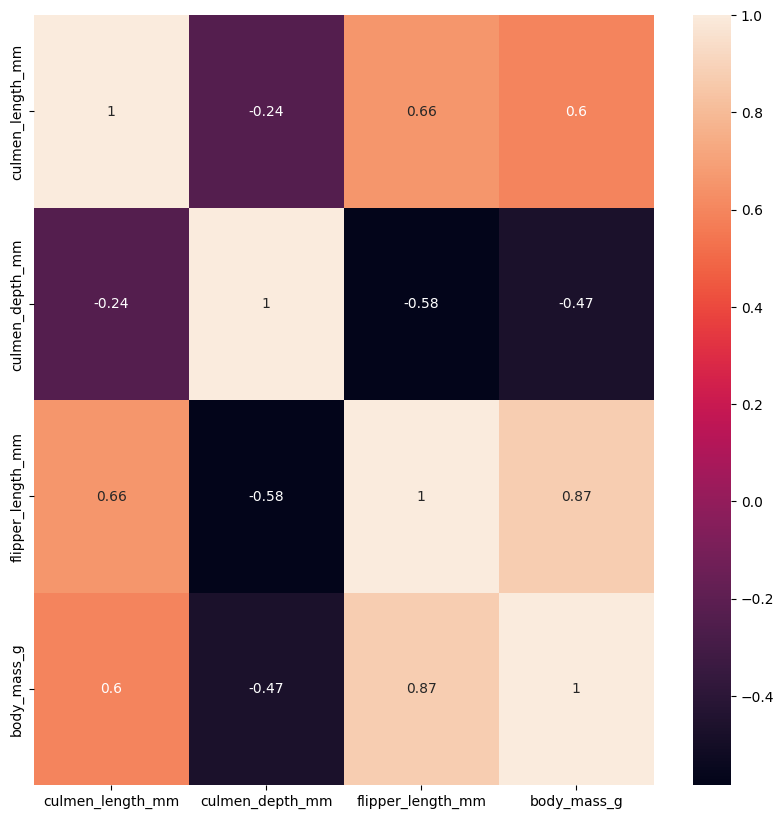

In [19]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(), annot=True)

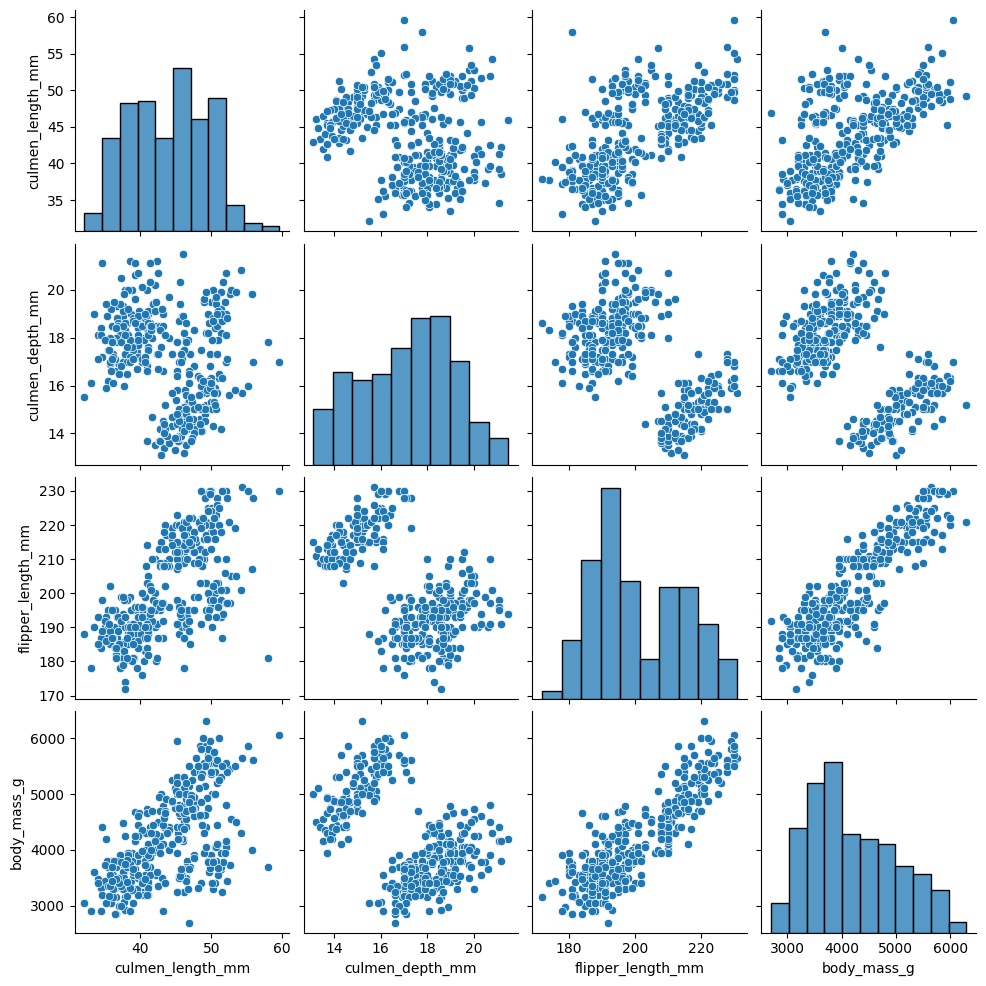

In [20]:
 sns.pairplot(data[['culmen_length_mm','culmen_depth_mm','flipper_length_mm','body_mass_g']])

## 4) Descriptive statistics

In [21]:
data.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [22]:
data.mean()

<ipython-input-22-abc01cf6c622>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.mean()


culmen_length_mm       43.921930
culmen_depth_mm        17.151170
flipper_length_mm     200.915205
body_mass_g          4201.754386
dtype: float64

In [23]:
data.std()

<ipython-input-23-a47ac8255c06>:1: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.std()


culmen_length_mm       5.459584
culmen_depth_mm        1.974793
flipper_length_mm     14.061714
body_mass_g          801.954536
dtype: float64

## 5)Handle the Missing values

In [24]:
#To find null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [25]:
data.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [26]:
data['culmen_length_mm'].fillna(data['culmen_length_mm'].mean(),inplace=True)
data['culmen_depth_mm'].fillna(data['culmen_depth_mm'].mean(),inplace=True)
data['flipper_length_mm'].fillna(data['flipper_length_mm'].mean(),inplace=True)
data['body_mass_g'].fillna(data['body_mass_g'].mean(),inplace=True)

In [27]:
data['sex'].fillna('MALE',inplace=True)

In [28]:
data.isnull().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [29]:
data

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.10000,18.70000,181.000000,3750.000000,MALE
1,Adelie,Torgersen,39.50000,17.40000,186.000000,3800.000000,FEMALE
2,Adelie,Torgersen,40.30000,18.00000,195.000000,3250.000000,FEMALE
3,Adelie,Torgersen,43.92193,17.15117,200.915205,4201.754386,MALE
4,Adelie,Torgersen,36.70000,19.30000,193.000000,3450.000000,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,43.92193,17.15117,200.915205,4201.754386,MALE
340,Gentoo,Biscoe,46.80000,14.30000,215.000000,4850.000000,FEMALE
341,Gentoo,Biscoe,50.40000,15.70000,222.000000,5750.000000,MALE
342,Gentoo,Biscoe,45.20000,14.80000,212.000000,5200.000000,FEMALE


#6) Find the outliers and replace them outliers#

<Axes: >

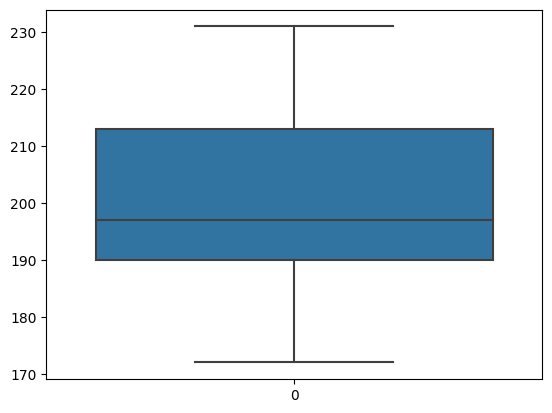

In [30]:
#identifying outliers using boxplot
sns.boxplot(data['flipper_length_mm'])

<Axes: >

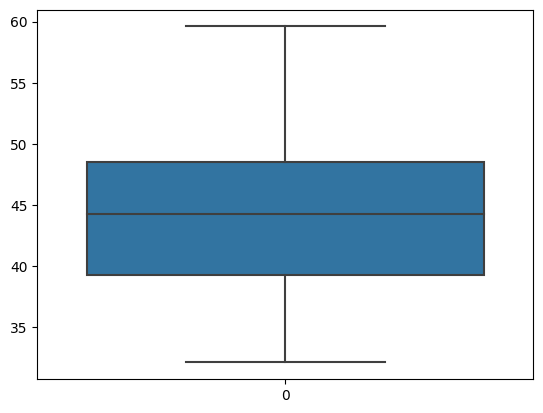

In [31]:
#identifying outliers using boxplot
sns.boxplot(data['culmen_length_mm'])

In [32]:
data_numeric=data[['body_mass_g','culmen_length_mm','culmen_depth_mm','flipper_length_mm']]

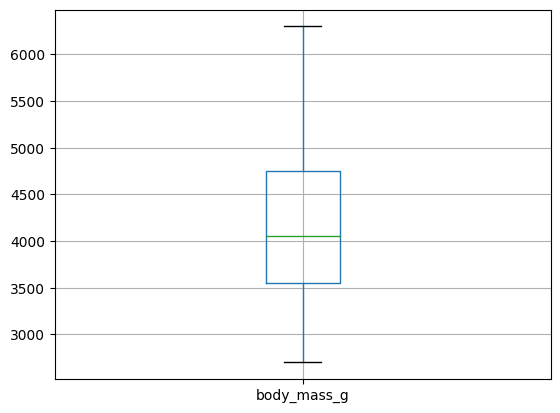

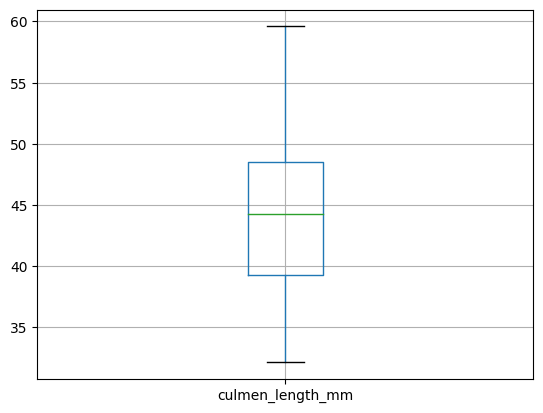

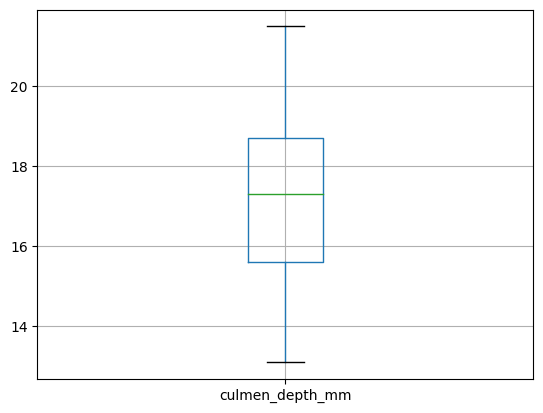

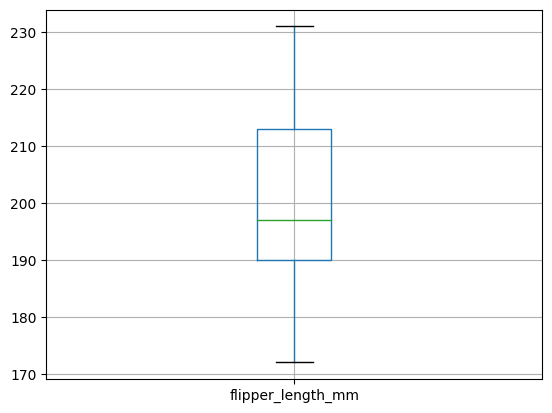

In [33]:
for i in data_numeric.columns:
  data[[i]].boxplot()
  plt.show()

In [34]:
def iqr(df):
  iqr=data_numeric.quantile(0.75)-data_numeric.quantile(0.25)
  upper_range=data_numeric.quantile(0.75)+(1.5*iqr)
  lower_range=data_numeric.quantile(0.25)-(1.5*iqr)
  return upper_range,lower_range
upper,lower=iqr(data_numeric)  

In [35]:
 print(upper,lower)

body_mass_g          6550.0000
culmen_length_mm       62.3375
culmen_depth_mm        23.3500
flipper_length_mm     247.5000
dtype: float64 body_mass_g          1750.0000
culmen_length_mm       25.4375
culmen_depth_mm        10.9500
flipper_length_mm     155.5000
dtype: float64


In [36]:
 
data['body_mass_g']=np.where(data['body_mass_g']>6550,1750,data['body_mass_g'])
data.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,344.000000,344.000000,344.000000,344.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.443643,1.969027,14.020657,799.613058
min,32.100000,13.100000,172.000000,2700.000000
25%,39.275000,15.600000,190.000000,3550.000000
50%,44.250000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


<Axes: >

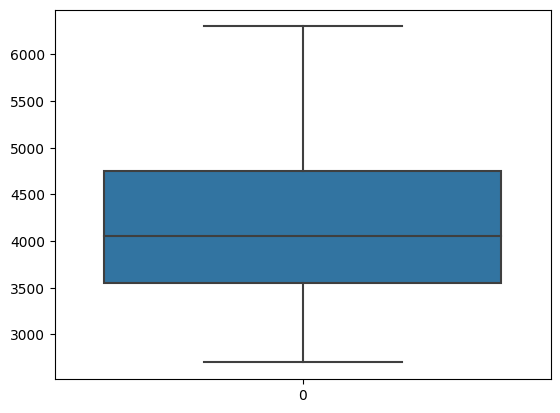

In [37]:
#afterreplacing outliers
sns.boxplot(data['body_mass_g'])

##7)Check for categorical columns and performing encoding##

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   344 non-null    float64
 3   culmen_depth_mm    344 non-null    float64
 4   flipper_length_mm  344 non-null    float64
 5   body_mass_g        344 non-null    float64
 6   sex                344 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [39]:
data_numeric=data[['culmen_length_mm','culmen_depth_mm','flipper_length_mm','body_mass_g']]
data_categorical=data[['species','island','sex']]

In [40]:
data_numeric.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
0,39.10000,18.70000,181.000000,3750.000000
1,39.50000,17.40000,186.000000,3800.000000
2,40.30000,18.00000,195.000000,3250.000000
3,43.92193,17.15117,200.915205,4201.754386
4,36.70000,19.30000,193.000000,3450.000000


In [41]:
data_categorical.head()

,species,island,sex
0,Adelie,Torgersen,MALE
1,Adelie,Torgersen,FEMALE
2,Adelie,Torgersen,FEMALE
3,Adelie,Torgersen,MALE
4,Adelie,Torgersen,FEMALE


In [42]:
print(data['species'].unique())
print(data['island'].unique())
print(data['sex'].unique())
 

['Adelie' 'Chinstrap' 'Gentoo']
['Torgersen' 'Biscoe' 'Dream']
['MALE' 'FEMALE' '.']


In [43]:
species_encoder=LabelEncoder()

In [44]:
species_encoder.fit(data_categorical['species'])

LabelEncoder()

In [45]:
species_values=species_encoder.transform(data_categorical['species'])

In [46]:
print("Before encoding:",list(data_categorical['species']))
print("After Encoding:",species_values)
print("The inverse from encoding result:",species_encoder.inverse_transform(species_values))

Before encoding: ['Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'A

#8)Scaling data

In [47]:
#for Box-Cox Transformation
from scipy import stats

# for min_max scaling
from mlxtend.preprocessing import minmax_scaling
# set seed for reproducibility
np.random.seed(0)


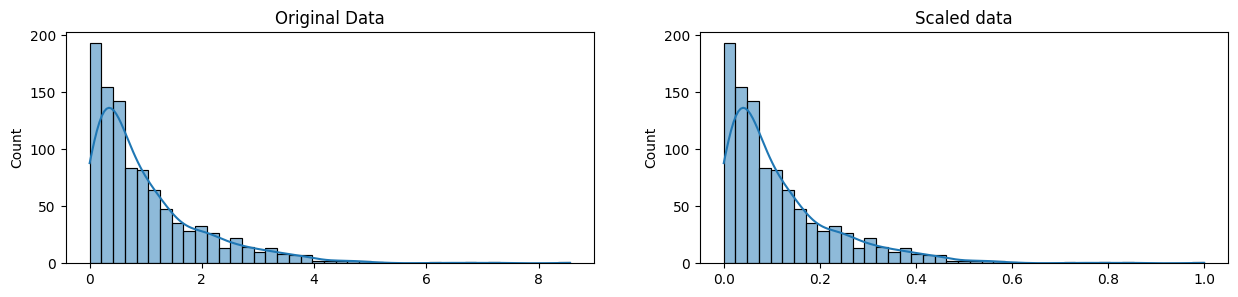

In [48]:
# generate 1000 data points randomly drawn from an exponential distribution
original_data = np.random.exponential(size=1000)

# mix-max scale the data between 0 and 1
scaled_data = minmax_scaling(original_data, columns=[0])

# plot both together to compare
fig, ax = plt.subplots(1, 2, figsize=(15, 3))
sns.histplot(original_data, ax=ax[0], kde=True, legend=False)
ax[0].set_title("Original Data")
sns.histplot(scaled_data, ax=ax[1], kde=True, legend=False)
ax[1].set_title("Scaled data")
plt.show()

#9)Applying Clustering Algorithm - K means Algorithm

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


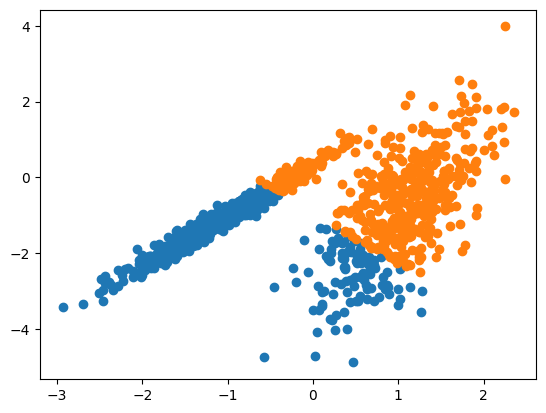

In [49]:
 # k-means clustering
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import KMeans
from matplotlib import pyplot
# define dataset
data_numeric, _ = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=4)
# define the model
model = KMeans(n_clusters=2)
# fit the model
model.fit(data_numeric)
# assign a cluster to each example
yhat = model.predict(data_numeric)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(yhat == cluster)
	# create scatter of these samples
	pyplot.scatter(data_numeric[row_ix, 0], data_numeric[row_ix, 1])
# show the plot
pyplot.show()

#10)Add the cluster data with primary dataset

In [50]:
from sklearn.cluster import KMeans
import pandas as pd



# Create a KMeans object with desired number of clusters
kmeans = KMeans(n_clusters=3)

# Fit KMeans to the primary dataset
kmeans.fit(data_numeric)

# Get the cluster labels for each data point in the primary dataset
cluster_labels = kmeans.predict(data_numeric)
 

 

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


##11)Split the Data into dependent and independent variables

In [51]:

x=data.iloc[:,:-1].values
print(x)

[['Adelie' 'Torgersen' 39.1 18.7 181.0 3750.0]
 ['Adelie' 'Torgersen' 39.5 17.4 186.0 3800.0]
 ['Adelie' 'Torgersen' 40.3 18.0 195.0 3250.0]
 ...
 ['Gentoo' 'Biscoe' 50.4 15.7 222.0 5750.0]
 ['Gentoo' 'Biscoe' 45.2 14.8 212.0 5200.0]
 ['Gentoo' 'Biscoe' 49.9 16.1 213.0 5400.0]]


In [52]:
y=data.iloc[:,-1].values
print(y)

['MALE' 'FEMALE' 'FEMALE' 'MALE' 'FEMALE' 'MALE' 'FEMALE' 'MALE' 'MALE'
 'MALE' 'MALE' 'MALE' 'FEMALE' 'MALE' 'MALE' 'FEMALE' 'FEMALE' 'MALE'
 'FEMALE' 'MALE' 'FEMALE' 'MALE' 'FEMALE' 'MALE' 'MALE' 'FEMALE' 'MALE'
 'FEMALE' 'FEMALE' 'MALE' 'FEMALE' 'MALE' 'FEMALE' 'MALE' 'FEMALE' 'MALE'
 'MALE' 'FEMALE' 'FEMALE' 'MALE' 'FEMALE' 'MALE' 'FEMALE' 'MALE' 'FEMALE'
 'MALE' 'MALE' 'MALE' 'FEMALE' 'MALE' 'FEMALE' 'MALE' 'FEMALE' 'MALE'
 'FEMALE' 'MALE' 'FEMALE' 'MALE' 'FEMALE' 'MALE' 'FEMALE' 'MALE' 'FEMALE'
 'MALE' 'FEMALE' 'MALE' 'FEMALE' 'MALE' 'FEMALE' 'MALE' 'FEMALE' 'MALE'
 'FEMALE' 'MALE' 'FEMALE' 'MALE' 'FEMALE' 'MALE' 'FEMALE' 'MALE' 'FEMALE'
 'MALE' 'FEMALE' 'MALE' 'FEMALE' 'MALE' 'MALE' 'FEMALE' 'MALE' 'FEMALE'
 'FEMALE' 'MALE' 'FEMALE' 'MALE' 'FEMALE' 'MALE' 'FEMALE' 'MALE' 'FEMALE'
 'MALE' 'FEMALE' 'MALE' 'FEMALE' 'MALE' 'FEMALE' 'MALE' 'FEMALE' 'MALE'
 'FEMALE' 'MALE' 'FEMALE' 'MALE' 'FEMALE' 'MALE' 'FEMALE' 'MALE' 'FEMALE'
 'MALE' 'FEMALE' 'MALE' 'FEMALE' 'MALE' 'FEMALE' 'MALE' 

scale the Independent variables

In [53]:
#INitialize the Scaler
scaler=StandardScaler()


(array([  6.,  21.,  83., 263., 318., 215.,  72.,  19.,   2.,   1.]),
 array([-3.53136432, -2.73167668, -1.93198904, -1.13230141, -0.33261377,
         0.46707386,  1.2667615 ,  2.06644914,  2.86613677,  3.66582441,
         4.46551205]),
 <BarContainer object of 10 artists>)

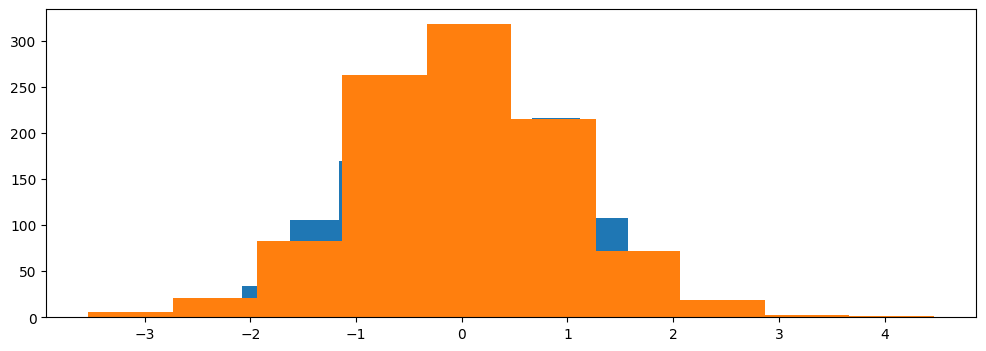

In [54]:
#to scale data
fig,ax=plt.subplots(figsize=(12,4))
 
x_std=scaler.fit_transform(data_numeric)
ax.hist(x_std[:,0])
ax.hist(x_std[:,1])

##12)Split the Data into Training and Testing

In [55]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.05,random_state=0)

In [56]:
x_train

array([['Adelie', 'Biscoe', 39.0, 17.5, 186.0, 3550.0],
       ['Adelie', 'Torgersen', 36.6, 17.8, 185.0, 3700.0],
       ['Gentoo', 'Biscoe', 46.2, 14.4, 214.0, 4650.0],
       ...,
       ['Adelie', 'Torgersen', 37.3, 20.5, 199.0, 3775.0],
       ['Adelie', 'Dream', 37.5, 18.9, 179.0, 2975.0],
       ['Chinstrap', 'Dream', 42.4, 17.3, 181.0, 3600.0]], dtype=object)

In [57]:
y_train

array(['FEMALE', 'FEMALE', 'MALE', 'FEMALE', 'MALE', 'FEMALE', 'MALE',
       'MALE', 'MALE', 'MALE', 'MALE', 'FEMALE', 'MALE', 'MALE', 'FEMALE',
       'FEMALE', 'MALE', 'MALE', 'MALE', 'MALE', 'MALE', 'MALE', 'MALE',
       'MALE', 'FEMALE', 'FEMALE', 'MALE', 'MALE', 'MALE', 'FEMALE',
       'MALE', 'FEMALE', 'FEMALE', 'FEMALE', 'FEMALE', 'FEMALE', 'MALE',
       'FEMALE', 'FEMALE', 'MALE', 'FEMALE', 'MALE', 'MALE', 'MALE',
       'FEMALE', 'MALE', 'MALE', 'FEMALE', 'MALE', 'MALE', 'MALE', 'MALE',
       'FEMALE', 'MALE', 'FEMALE', 'MALE', 'MALE', 'FEMALE', 'FEMALE',
       'FEMALE', 'FEMALE', 'MALE', 'FEMALE', 'MALE', 'FEMALE', 'FEMALE',
       'FEMALE', 'FEMALE', 'MALE', 'FEMALE', 'MALE', 'FEMALE', 'FEMALE',
       'FEMALE', 'MALE', 'FEMALE', 'FEMALE', 'FEMALE', 'MALE', 'FEMALE',
       'FEMALE', 'MALE', 'FEMALE', 'FEMALE', 'MALE', 'MALE', 'FEMALE',
       'MALE', 'FEMALE', 'MALE', 'MALE', 'FEMALE', 'FEMALE', 'FEMALE',
       'MALE', 'MALE', 'MALE', 'FEMALE', 'FEMALE', 'MALE', 'MAL

In [58]:
x_test

array([['Adelie', 'Dream', 40.6, 17.2, 187.0, 3475.0],
       ['Adelie', 'Torgersen', 38.9, 17.8, 181.0, 3625.0],
       ['Adelie', 'Biscoe', 35.7, 16.9, 185.0, 3150.0],
       ['Gentoo', 'Biscoe', 50.0, 15.3, 220.0, 5550.0],
       ['Adelie', 'Biscoe', 34.5, 18.1, 187.0, 2900.0],
       ['Gentoo', 'Biscoe', 45.5, 14.5, 212.0, 4750.0],
       ['Adelie', 'Torgersen', 38.8, 17.6, 191.0, 3275.0],
       ['Chinstrap', 'Dream', 55.8, 19.8, 207.0, 4000.0],
       ['Gentoo', 'Biscoe', 45.1, 14.5, 207.0, 5050.0],
       ['Adelie', 'Biscoe', 35.0, 17.9, 192.0, 3725.0],
       ['Adelie', 'Biscoe', 41.0, 20.0, 203.0, 4725.0],
       ['Gentoo', 'Biscoe', 43.3, 13.4, 209.0, 4400.0],
       ['Adelie', 'Dream', 32.1, 15.5, 188.0, 3050.0],
       ['Gentoo', 'Biscoe', 46.2, 14.9, 221.0, 5300.0],
       ['Gentoo', 'Biscoe', 46.2, 14.5, 209.0, 4800.0],
       ['Adelie', 'Dream', 42.2, 18.5, 180.0, 3550.0],
       ['Adelie', 'Biscoe', 36.4, 17.1, 184.0, 2850.0],
       ['Gentoo', 'Biscoe', 45.8, 14.6, 210

In [59]:
print(x_test.shape)
print(x_train.shape)
print(y_test.shape)
print(y_train.shape)

(18, 6)
(326, 6)
(18,)
(326,)


##13)Build the model##

In [60]:
from sklearn import linear_model
from sklearn import tree
from sklearn import ensemble
from sklearn import svm
import xgboost

In [61]:
lin_reg=linear_model.LinearRegression()
Dtree=tree.DecisionTreeRegressor()
Rand=ensemble.RandomForestRegressor()
svr=svm.SVR()
XGB=xgboost.XGBRegressor()

In [62]:
data[['species','island','sex']]=data[['species','island','sex']].astype('category')

In [63]:
data.dtypes

species              category
island               category
culmen_length_mm      float64
culmen_depth_mm       float64
flipper_length_mm     float64
body_mass_g           float64
sex                  category
dtype: object

In [64]:
x=data[['culmen_length_mm','culmen_depth_mm']]
y=data[['body_mass_g','flipper_length_mm']]

In [65]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4,random_state=100)

In [66]:
lin_reg.fit(x_train,y_train)
Dtree.fit(x_train,y_train)
Rand.fit(x_train,y_train)
XGB.fit(x_train,y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

##14)Train the Model

In [67]:

from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [68]:
model.fit(x_train, y_train)


LinearRegression()

model.fit(x_train, y_train)


In [69]:
print(model.coef_)

[[  70.84912701 -138.66676498]
 [   1.43337774   -2.99350902]]


In [70]:
print(model.intercept_)

[3518.38541496  189.72534525]


##15)Test the Model

In [71]:
p1=lin_reg.predict(x_test)
p2=Dtree.predict(x_test)
p3=Rand.predict(x_test)
p5=XGB.predict(x_test)

In [72]:
from sklearn import metrics
print(metrics.r2_score(p1,y_test))
print(metrics.r2_score(p2,y_test))
print(metrics.r2_score(p3,y_test))
print(metrics.r2_score(p5,y_test))

0.005054912522605481
0.5699449182228318
0.6347515262337744
0.6154150830206941


In [73]:
def calc(slope, intercept, hours):
    return slope*hours+intercept

score = calc(model.coef_, model.intercept_, 9.5)
print(score)


[[ 4191.45212158 -1127.60892209]
 [ 3532.00250344   161.28700959]]


In [74]:
 y_pred = model.predict(x_test)

##16)Measure the performance using Metrics.

In [75]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [76]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

In [77]:
data

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.10000,18.70000,181.000000,3750.000000,MALE
1,Adelie,Torgersen,39.50000,17.40000,186.000000,3800.000000,FEMALE
2,Adelie,Torgersen,40.30000,18.00000,195.000000,3250.000000,FEMALE
3,Adelie,Torgersen,43.92193,17.15117,200.915205,4201.754386,MALE
4,Adelie,Torgersen,36.70000,19.30000,193.000000,3450.000000,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,43.92193,17.15117,200.915205,4201.754386,MALE
340,Gentoo,Biscoe,46.80000,14.30000,215.000000,4850.000000,FEMALE
341,Gentoo,Biscoe,50.40000,15.70000,222.000000,5750.000000,MALE
342,Gentoo,Biscoe,45.20000,14.80000,212.000000,5200.000000,FEMALE
